In [3]:
import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use("ggplot")
import time


In [4]:
result = pyreadr.read_r("data/point_by_point.RData")

I have looked at the atp_elo, atp_importance, atp_odds, and atp_rankings datasets

In [5]:
print(result.keys())

odict_keys(['point_by_point'])


In [6]:
df= result['point_by_point']
df.columns

Index(['date', 'tny_name', 'tour', 'draw', 'server1', 'server2', 'winner',
       'score', 'adf_flag', 'tny_date', 'W1', 'W2', 'W3', 'W4', 'W5', 'L1',
       'L2', 'L3', 'L4', 'L5', 'WTB1', 'LTB1', 'WTB2', 'LTB2', 'WTB3', 'LTB3',
       'WTB4', 'LTB4', 'WTB5', 'LTB5', 'Set1', 'Set2', 'Set3', 'Set4', 'Set5',
       'TB1', 'TB2', 'TB3', 'TB4', 'TB5'],
      dtype='object')

In [7]:
len(df)
#men's atp tour data goes to row 74,000
score = df.score[0].split()
score_lst =[]
for i,element in enumerate(score):
    score_lst.append(element.split("-"))
score_lst
    

[['6', '4'], ['6', '1']]

In [8]:
df.head(5)

,date,tny_name,tour,draw,server1,server2,winner,score,adf_flag,tny_date,...,Set1,Set2,Set3,Set4,Set5,TB1,TB2,TB3,TB4,TB5
0,28 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Olivier Rochus,Fabio Fognini,2,6-4 6-1,0,15183.0,...,SSSS;RRRR;SSRRSS;SSRRSS;RSRSRSRR;SSRSS;RSRRSR;...,SRRRSSRR;SRSRRR;RSSRRR;RRRSSSRSSRSS;RSSRRSRR;S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Robin Haase,Marin Cilic,2,4-6 6-4 6-3,0,15183.0,...,SSRSS;RRSSRSSS;SSSS;RSSSS;SRSRSS;RSRSRSSS;RSRS...,RSSRSRSRSRRR;RSSSS;SSRSS;SRRRSSSRSS;SRSRSRSS;S...,RRSSRR;SRSRRR;RRRR;SSRSRRRSSRSS;SRSRRSSS;SRRRS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Marin Cilic,Andreas Seppi,1,6-1 6-3,0,15184.0,...,SSSS;SRRRR;SSRRRSSS;RSRRSSSS;RSRSSS;SRRRR;SSRSS,RSRSRSSS;SSSS;SSSRRS;SSRRSS;RRSSRSRSRR;SRSSS;R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Alexandr Dolgopolov,Albert Ramos,1,6-3 7-5,0,15184.0,...,SRSSRS;RRSSSRSS;RSRSSRSRSS;RRRR;SSRSS;SRSSS;SR...,SSSS;SRSSS;SSRRRSSRSRRSSS;SSSS;RSRSRR;SSSS;RSR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Carlos Berlocq,Juan Carlos Ferrero,2,6-1 7-6(5),0,15184.0,...,RRRR;SRSSS;SSRRSS;RSRSSS;RRRSR;SSSRRS;RRRR,SRRSSS;RRRR;RSRRSR;RSSSRRRR;SSSS;RRRSSR;RRRR;R...,NaN,NaN,NaN,NaN,R/RR/RS/RS/RS/SR/S,NaN,NaN,NaN


In [9]:
df_new = df[(df["server1"]=="Fabio Fognini") | (df["server2"]=="Fabio Fognini")]
df_new


,date,tny_name,tour,draw,server1,server2,winner,score,adf_flag,tny_date,...,Set1,Set2,Set3,Set4,Set5,TB1,TB2,TB3,TB4,TB5
0,28 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Olivier Rochus,Fabio Fognini,2,6-4 6-1,0,15183.0,...,SSSS;RRRR;SSRRSS;SSRRSS;RSRSRSRR;SSRSS;RSRRSR;...,SRRRSSRR;SRSRRR;RSSRRR;RRRSSSRSSRSS;RSSRRSRR;S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,30 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Marin Cilic,Fabio Fognini,1,6-2 6-2,0,15185.0,...,SSSS;RSSSS;RSSRSS;SSSRRRSRSRRR;SSRRSRRSSS;SRSR...,RSRSRR;SRSSRS;SSSRS;RRSRR;SRSRRSSS;RSSRRR;SRSS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,09 Aug 11,RogersCup-ATPMontreal2011,ATP,Main,Jo-Wilfried Tsonga,Fabio Fognini,1,6-4 7-6(0),0,15195.0,...,SRSSS;SRSRRR;RSSSS;SSRSRS;SSSS;RSSRSRSS;SRRSSS...,RRRSR;SRSRSS;SRSSS;SSSS;SSRRSS;RRSSSS;RSRSSS;R...,NaN,NaN,NaN,NaN,S/RR/SS/RR,NaN,NaN,NaN
95,09 Aug 11,RogersCup-ATPMontreal2011.html,ATP,Main,Jo-Wilfried Tsonga,Fabio Fognini,1,6-4 7-6(0),0,15195.0,...,SRSSS;SRSRRR;RSSSS;SSRSRS;SSSS;RSSRSRSS;SRRSSS...,RRRSR;SRSRSS;SRSSS;SSSS;SSRRSS;RRSSSS;RSRSSS;R...,NaN,NaN,NaN,NaN,S/RR/SS/RR,NaN,NaN,NaN
104,15 Aug 11,Western&amp;SouthernOpen-ATPCincinnati2011,ATP,Main,Fabio Fognini,Viktor Troicki,1,6-4 6-1,0,15201.0,...,SRSRSS;SSSS;RSSRSS;SRRSSRSRSS;SSRSRS;RRSRSSSRR...,SSSS;RSRSSRRSRSRSSRRR;SRRSSS;SSRRSRRR;SSRRSS;S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,17 Aug 11,Western&amp;SouthernOpen-ATPCincinnati2011,ATP,Main,Fabio Fognini,James Blake,2,6-4 6-2,0,15203.0,...,SRRSRR;RSRSSRSS;SRSRSRSS;SSRSS;SRSSS;RRSSRSSS;...,RRRR;SSSS;RSRRR;SSSS;SSSRRRSS;SSSRS;SSRRRSSRSS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,04 Oct 11,ChinaOpen-ATPBeijing2012,ATP,Main,Grega Zemlja,Fabio Fognini,2,6-4 6-1,0,15251.0,...,RRSSSS;RSSRSS;SRSSS;SSSRRS;SSRRRSRR;SSSS;SSSS;...,RRSRR;RSRSSS;RSRSRSRSRR;RSSSRS;RRSSSRSS;RSRSSR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,06 Oct 11,ChinaOpen-ATPBeijing2012,ATP,Main,Marin Cilic,Fabio Fognini,1,6-2 6-7(1) 6-3,0,15253.0,...,SSSS;RSRRSR;RRRR;RRSSSS;SSSS;RRSRSSRR;RRSSSRSS...,SRSRSS;RSSRRR;SRSSS;RSSRSS;SSSS;RRSSSRSS;RSRSR...,SRSSS;SSSS;RRRSR;SSRSS;SRRSSRSS;SSSS;RRRR;RRRR...,NaN,NaN,NaN,R/SS/RR/SR/R,NaN,NaN,NaN
349,26 Sep 11,PTTThailandOpen-ATPBangkok2011,ATP,Main,Fabio Fognini,Danai Udomchoke,2,6-4 3-6 6-2,0,15243.0,...,SSSRRS;SSSS;RRSSSS;SSSS;SSSRRS;RRSSSS;SSSS;RSS...,SSSS;SRSRSRRSSS;RSRSRR;RRSRSR;RSSRRSSS;SRRRSR;...,SSSRS;SRSSS;SSSRRS;RRRR;SSSS;SSRRSRSRSRSRRSRR;...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,09 Oct 11,ShanghaiRolexMasters-ATPShanghai2011,ATP,Main,Fabio Fognini,Florian Mayer,2,6-0 6-2,0,15256.0,...,RRRR;SSSS;SRRSRR;SRSSRS;RRRR;SRSSS,SSRRRSSS;SSSS;SRRSSRRR;RSRSSRSS;SRSSS;SSSS;RRS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#given a list of strings for the server in a set which they won
#determine the win pt percentage by point for service games in the set

def point_by_sgame_perc(lst_of_str):
    lst_of_pt_perc = []
    l=[len(element) for i,element in enumerate(lst_of_str)]
    l_idx = min(max(l),12)
    for i in range(l_idx):
        count, total = 0,0
        for j in range(len(lst_of_str)):
            if len(lst_of_str[j])-1 >= i:
                if lst_of_str[j][i]=="S":
                    count += 1
                    total += 1
                else:
                    total += 1
            else:
                pass
        lst_of_pt_perc.append(count/total)
    return lst_of_pt_perc

In [11]:
#given a list of strings for the returner in a set which they won
#determine the win pt percentage by point within return games in a set

def point_by_rgame_perc(lst_of_str):
    lst_of_pt_perc = []
    l=[len(element) for i,element in enumerate(lst_of_str)]
    l_idx = min(max(l),12)
    for i in range(l_idx):
        count, total = 0,0
        for j in range(len(lst_of_str)):
            if len(lst_of_str[j])-1 >= i:
                if lst_of_str[j][i]=="R":
                    count += 1
                    total += 1
                else:
                    total += 1
            else:
                pass
        lst_of_pt_perc.append(count/total)
    return lst_of_pt_perc

In [12]:
#must figure out if player one or two won the set
#and then filter out their service games which they played in the winning set
def get_lst_of_strings_to_decode(x):
    pt_hist_lst_games = x.split(";")
#    if df["winner"].item() == 2:
#        lst_of_strings = pt_hist_lst_games[1::2]
#    else:
#        lst_of_strings = pt_hist_lst_games[0::2]
    return pt_hist_lst_games

In [13]:
df[0:0+1]["winner"] == 2

0    True
Name: winner, dtype: bool

In [14]:
df_exam = df_new[0:10]
df_exam.head()

,date,tny_name,tour,draw,server1,server2,winner,score,adf_flag,tny_date,...,Set1,Set2,Set3,Set4,Set5,TB1,TB2,TB3,TB4,TB5
0,28 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Olivier Rochus,Fabio Fognini,2,6-4 6-1,0,15183.0,...,SSSS;RRRR;SSRRSS;SSRRSS;RSRSRSRR;SSRSS;RSRRSR;...,SRRRSSRR;SRSRRR;RSSRRR;RRRSSSRSSRSS;RSSRRSRR;S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,30 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Marin Cilic,Fabio Fognini,1,6-2 6-2,0,15185.0,...,SSSS;RSSSS;RSSRSS;SSSRRRSRSRRR;SSRRSRRSSS;SRSR...,RSRSRR;SRSSRS;SSSRS;RRSRR;SRSRRSSS;RSSRRR;SRSS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,09 Aug 11,RogersCup-ATPMontreal2011,ATP,Main,Jo-Wilfried Tsonga,Fabio Fognini,1,6-4 7-6(0),0,15195.0,...,SRSSS;SRSRRR;RSSSS;SSRSRS;SSSS;RSSRSRSS;SRRSSS...,RRRSR;SRSRSS;SRSSS;SSSS;SSRRSS;RRSSSS;RSRSSS;R...,NaN,NaN,NaN,NaN,S/RR/SS/RR,NaN,NaN,NaN
95,09 Aug 11,RogersCup-ATPMontreal2011.html,ATP,Main,Jo-Wilfried Tsonga,Fabio Fognini,1,6-4 7-6(0),0,15195.0,...,SRSSS;SRSRRR;RSSSS;SSRSRS;SSSS;RSSRSRSS;SRRSSS...,RRRSR;SRSRSS;SRSSS;SSSS;SSRRSS;RRSSSS;RSRSSS;R...,NaN,NaN,NaN,NaN,S/RR/SS/RR,NaN,NaN,NaN
104,15 Aug 11,Western&amp;SouthernOpen-ATPCincinnati2011,ATP,Main,Fabio Fognini,Viktor Troicki,1,6-4 6-1,0,15201.0,...,SRSRSS;SSSS;RSSRSS;SRRSSRSRSS;SSRSRS;RRSRSSSRR...,SSSS;RSRSSRRSRSRSSRRR;SRRSSS;SSRRSRRR;SSRRSS;S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_exam["pt_perc"]=df_exam["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x))
df_exam["pt_perc_num"]= df_exam["pt_perc"].apply(lambda x: point_by_sgame_perc(x))
df_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 447
Data columns (total 42 columns):
date           10 non-null object
tny_name       10 non-null object
tour           10 non-null object
draw           10 non-null object
server1        10 non-null object
server2        10 non-null object
winner         10 non-null int32
score          10 non-null object
adf_flag       10 non-null int32
tny_date       10 non-null float64
W1             10 non-null object
W2             10 non-null object
W3             2 non-null object
W4             0 non-null object
W5             0 non-null object
L1             10 non-null object
L2             10 non-null object
L3             2 non-null object
L4             0 non-null object
L5             0 non-null object
WTB1           0 non-null float64
LTB1           0 non-null float64
WTB2           3 non-null float64
LTB2           3 non-null float64
WTB3           0 non-null float64
LTB3           0 non-null float64
WTB4           0 no

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


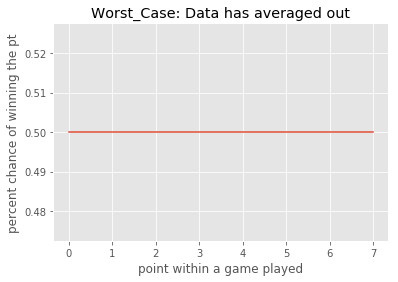

In [35]:
fig, ax = plt.subplots()
ax.plot(range(8),[.5,.5,.5,.5,.5,.5,.5,.5])
ax.set_title("Worst_Case: Data has averaged out")
ax.set_xlabel("point within a game played")
ax.set_ylabel("percent chance of winning the pt")
plt.savefig("images/WorstCase")
plt.show()

In [ ]:
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"]#,"Pt13","Pt14"]
df3=pd.DataFrame(df_exam.pt_perc_num.tolist(),columns=columns)
df3


In [ ]:
df3.mean()
df3.describe()

In [ ]:
df_4= df_exam[df_exam["winner"]==1]
df_4

In [ ]:
df_4["pt_perc"]=df_4["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[0::2])
df_4["pt_perc_num"]= df_4["pt_perc"].apply(lambda x: point_by_sgame_perc(x))
df_4

In [ ]:
df_4.pt_perc[0:1]

In [ ]:
df_4.Set1

In [19]:
#let's get 100 matches where player 1 was the match winner and look at just their service games.
#let's map our two functions and make a new df with pt percentages.  Next, let's aggregate and get the means, then 
#make a plot
df_try = df[df["winner"]==1].head(2500)
df_try["pt_perc"]=df_try["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[0::2])
df_try["pt_perc_num"]= df_try["pt_perc"].apply(lambda x: point_by_sgame_perc(x))
#df_try.head()
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"] #,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18","Pt19","Pt20"]
df_try_final=pd.DataFrame(df_try.pt_perc_num.tolist(),columns=columns)
df_try_final
y6=df_try_final.mean()[0:8]
y6

Pt1    0.662453
Pt2    0.651120
Pt3    0.653793
Pt4    0.643153
Pt5    0.652225
Pt6    0.655382
Pt7    0.650137
Pt8    0.671578
dtype: float64

<Figure size 1440x1152 with 0 Axes>

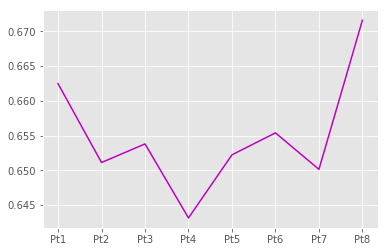

In [21]:
fig = plt.figure(figsize=(20,16))
fig, ax = plt.subplots(1,1)
#ax.plot(y1, c="r", label="100 sets")
#ax.plot(y4, c="b", label ="1,000 sets")
ax.plot(y6, c="m", label = "2,500 sets")
#ax.plot(y6)
#ax.plot(y5, c="c", label ="5,000 sets")
#ax.plot(y3, c="g", label = "10,000 sets")
#plt.title("Variation of pt win% on serve with sample size")
#plt.legend()
plt.savefig("images/ServeWinPtPerc.png")
plt.show()

In [23]:
#let's take a look at the winning players pt% in return games and plot
df_return = df[df["winner"]==1].head(2500)
df_return["pt_perc"]=df_return["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[1::2])
df_return["pt_perc_num"]= df_return["pt_perc"].apply(lambda x: point_by_rgame_perc(x))
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"]#,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18"]
df_return_final=pd.DataFrame(df_return.pt_perc_num.tolist(),columns=columns)
df_return_final
df_return_final.count()
y=df_return_final.mean()[0:8]
y
y_avg = y.mean()
y_avg



0.4130233309456158

<Figure size 1440x1152 with 0 Axes>

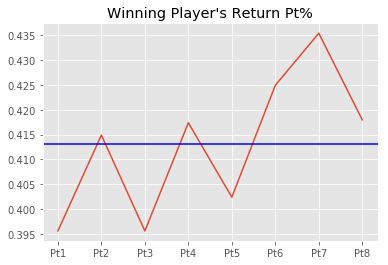

In [25]:
fig = plt.figure(figsize=(20,16))
fig, ax = plt.subplots(1,1)
ax.plot(y)
ax.axhline(y_avg, c="b")
plt.title("Winning Player's Return Pt%")
plt.savefig("images/ReturnWinPtPerc.png")
plt.show()

In [27]:
#given a list of strings for the set winner in which server one is the match winner
#determine the win pt percentage by game for all games in a set

def lst_of_games_won(lst_of_str):
    lst_of_gm_wins = []
    for i in range(len(lst_of_str)):
        if i%2==0:
            if lst_of_str[i][-1]=="S":
                lst_of_gm_wins.append(1)
            else:
                lst_of_gm_wins.append(0)
        else:
            if lst_of_str[i][-1]=="R":
                lst_of_gm_wins.append(1)
            else:
                lst_of_gm_wins.append(0)
    return lst_of_gm_wins

In [ ]:
df[df["winner"]==1].head()

In [28]:
df_game_pct = df[df["winner"]==1].head(2500)
df_game_pct["lst_of_game_strings"]=df_game_pct["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x))
df_game_pct["lst_games_won"]= df_game_pct["lst_of_game_strings"].apply(lambda x: lst_of_games_won(x))
columns =["Gm1","Gm2","Gm3","Gm4","Gm5","Gm6","Gm7","Gm8","Gm9","Gm10","Gm11","Gm12"]
df_game_pct_final=pd.DataFrame(df_game_pct.lst_games_won.tolist(),columns=columns)
df_game_pct_final
games=df_game_pct_final.sum()/df_game_pct_final.count()
s_games = games[::2]
r_games = games[1::2]
r_games

#y=df_game_pct_final.mean()[0:12]




Gm2     0.297200
Gm4     0.308000
Gm6     0.314400
Gm8     0.281870
Gm10    0.297095
Gm12    0.294753
dtype: float64

<Figure size 1440x1152 with 0 Axes>

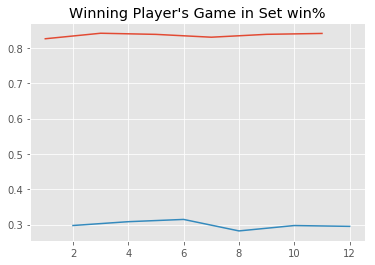

In [31]:
fig = plt.figure(figsize=(20,16))
fig, ax = plt.subplots(1,1)
x1 = np.arange(1,12,2)
ax.plot(x1,s_games)
x2 = np.arange(2,13,2)
ax.plot(x2,r_games)
plt.title("Winning Player's Game in Set win%")
plt.savefig("images/WinGameSetPerc.png")
plt.show()

In [ ]:
#How big of a dataframe can I analyze on my current machine and how long will it take
df_size = df[df["winner"]==1].head(60000)
df_size["pt_perc"]=df_size["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[0::2])
df_size["pt_perc_num"]= df_size["pt_perc"].apply(lambda x: point_by_sgame_perc(x))
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"]#,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18","Pt19","Pt20","Pt21","Pt22","Pt23","Pt24","Pt25","Pt26","Pt27","Pt28","Pt29","Pt30","Pt31","Pt32"]
df_size_final=pd.DataFrame(df_size.pt_perc_num.tolist(),columns=columns)
df_size_final
df_size_final.count()
y=df_size_final.mean()[0:8]

In [ ]:
df_try.info()


In [ ]:
df_try_final

In [ ]:
fig = plt.figure(figsize=(12,8))
fig, ax = plt.subplots(1,1)
ax.hist(df_try_final.Pt1, bins=20, alpha =0.5, label="SPt1")
ax.hist(df_try_final.Pt2, bins=20, alpha =0.5, label="SPt2")
ax.hist(df_try_final.Pt3, bins=20, alpha =0.5, label="SPt3")
#ax.plot(y4, c="b", label ="1,000 sets")
#ax.plot(y6, c="m", label = "2,500 sets")
#ax.plot(y5, c="c", label ="5,000 sets")
#ax.plot(y3, c="g", label = "10,000 sets")
#plt.title("Variation of pt win% on serve with sample size")
plt.legend()
#plt.savefig("images/SampleSize.png")
plt.show()


Histogram by Pt on serve is not very interesting.  I was hoping for a norman distribution

Is there a size limit on a jupyter notebook before it breaks down?

In [ ]:
df_wed=df[df["winner"]==1].head(2500)

In [ ]:
df_win_serve = df[df["winner"]==1].head(2500)
df_win_serve["pt_perc"]=df_win_serve["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[0::2])
df_win_serve["pt_perc_num"]= df_win_serve["pt_perc"].apply(lambda x: point_by_sgame_perc(x))
#df_try.head()
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"] #,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18","Pt19","Pt20"]
df_win_serve_final=pd.DataFrame(df_win_serve.pt_perc_num.tolist(),columns=columns)
df_win_serve_final
s_win=df_win_serve_final.mean()[0:8]
s_win
df_win_return = df[df["winner"]==1].head(2500)
df_win_return["pt_perc"]=df_win_return["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[1::2])
df_win_return["pt_perc_num"]= df_win_return["pt_perc"].apply(lambda x: point_by_rgame_perc(x))
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"]#,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18"]
df_win_return_final=pd.DataFrame(df_win_return.pt_perc_num.tolist(),columns=columns)
df_win_return_final
df_win_return_final.count()
r_win=df_win_return_final.mean()[0:8]
r_win

In [ ]:
df_lose_serve = df[df["winner"]==1].head(2500)
df_lose_serve["pt_perc"]=df_lose_serve["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[1::2])
df_lose_serve["pt_perc_num"]= df_lose_serve["pt_perc"].apply(lambda x: point_by_sgame_perc(x))
#df_try.head()
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"] #,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18","Pt19","Pt20"]
df_lose_serve_final=pd.DataFrame(df_lose_serve.pt_perc_num.tolist(),columns=columns)
df_lose_serve_final
s_lose=df_lose_serve_final.mean()[0:8]
s_lose
df_lose_return = df[df["winner"]==1].head(2500)
df_lose_return["pt_perc"]=df_lose_return["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[0::2])
df_lose_return["pt_perc_num"]= df_lose_return["pt_perc"].apply(lambda x: point_by_rgame_perc(x))
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"]#,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18"]
df_lose_return_final=pd.DataFrame(df_lose_return.pt_perc_num.tolist(),columns=columns)
df_lose_return_final
df_lose_return_final.count()
r_lose=df_lose_return_final.mean()[0:8]
r_lose

In [ ]:
fig = plt.figure(figsize=(12,8))
fig, ax = plt.subplots(1,1)
ax.plot(s_win, c="r", label="Winning Server")
ax.plot(r_win, c="b", label ="Winning Returner")
ax.plot(s_lose, c="m", label = "Losing Server")
ax.plot(r_lose, c="c", label ="Losing Returner")
plt.title("Pt %'s for both winner and loser")
plt.legend()
plt.savefig("images/Winner-Loser-Pts.png")
plt.show()